In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import OrderedDict

In [14]:
from dataloader import read_bci_data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [15]:
# Load data
train_data, train_label, test_data, test_label = read_bci_data()

# Convert data type into float32
train_data  = torch.from_numpy(train_data).type(torch.float32)
train_label = torch.from_numpy(train_label).type(torch.long)
test_data   = torch.from_numpy(test_data).type(torch.float32)
test_label  = torch.from_numpy(test_label).type(torch.long)

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


## Implement EEGNet

In [16]:
from EEGNet import EEGNet
net = EEGNet().to(device)

In [17]:
net.parameters

<bound method Module.parameters of EEGNet(
  (firstconv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 51), stride=(1, 1), padding=(0, 25), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (depthwiseConv): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 1), stride=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (4): Dropout2d(p=0.25, inplace=False)
  )
  (seperableConv): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 15), stride=(1, 1), padding=(0, 7), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0)
    (4): Dropout2d(p=0.25, inplace=False)
    (5): Flatten()
  )
  (classify): Sequential(
    (0): Linear(in_featu

# Run Model

In [18]:
from run_model import run
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label)

epoch  20  : loss =  6.164500832557678
epoch  40  : loss =  4.691166311502457
epoch  60  : loss =  3.6965762227773666
epoch  80  : loss =  2.5415901243686676
epoch  100  : loss =  2.155465878546238
epoch  120  : loss =  1.5066972821950912
epoch  140  : loss =  1.295962542295456
epoch  160  : loss =  1.137091375887394
epoch  180  : loss =  1.1343036741018295
epoch  200  : loss =  0.8025924265384674
epoch  220  : loss =  0.7938263807445765
epoch  240  : loss =  0.639405102469027
epoch  260  : loss =  0.5079749207943678
epoch  280  : loss =  0.659182888455689
epoch  300  : loss =  0.4217151701450348


# Draw loss & accuracy figures

In [19]:
import matplotlib.pyplot as plt

def drow_figure(x):
    plt.plot(range(len(x)), x)
    plt.show()

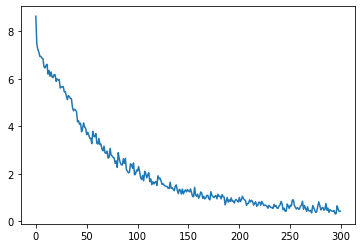

In [20]:
drow_figure(loss_list)

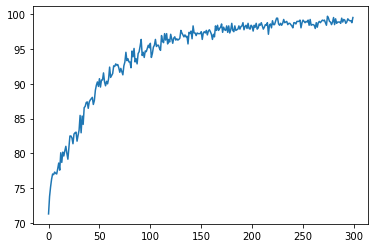

In [21]:
drow_figure(acc_train_list)

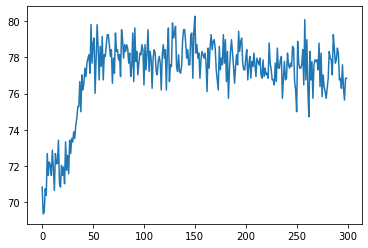

In [22]:
drow_figure(acc_test_list)